# Lambda School Data Science

*Unit 2, Sprint 1, Module 2*

---

In [2]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'

# Module Project: Regression II

In this project, you'll continue working with the New York City rent dataset you used in the last module project.

## Directions

The tasks for this project are as follows:

- **Task 1:** Import `csv` file using `wrangle` function.
- **Task 2:** Conduct exploratory data analysis (EDA), and modify `wrangle` function to engineer two new features.
- **Task 3:** Split data into feature matrix `X` and target vector `y`.
- **Task 4:** Split feature matrix `X` and target vector `y` into training and test sets.
- **Task 5:** Establish the baseline mean absolute error for your dataset.
- **Task 6:** Build and train a `Linearregression` model.
- **Task 7:** Calculate the training and test mean absolute error for your model.
- **Task 8:** Calculate the training and test $R^2$ score for your model.
- **Stretch Goal:** Determine the three most important features for your linear regression model.

**Note**

You should limit yourself to the following libraries for this project:

- `matplotlib`
- `numpy`
- `pandas`
- `sklearn`

# I. Wrangle Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def wrangle(filepath):
    #df = pd.read_csv(filepath)
    #df = pd.read_csv(filepath, parse_dates=['created'], index_col='created')
    #making an index 'created' as datetime, either order...
    df = pd.read_csv(filepath, index_col = ['created'],parse_dates = ['created'])
    # Remove the most extreme 1% prices,
    # the most extreme .1% latitudes, &
    # the most extreme .1% longitudes
    df = df[(df['price'] >= np.percentile(df['price'], 0.5))
            & (df['price'] <= np.percentile(df['price'], 99.5))
            & (df['latitude'] >= np.percentile(df['latitude'], 0.05))
            & (df['latitude'] < np.percentile(df['latitude'], 99.95))
            & (df['longitude'] >= np.percentile(df['longitude'], 0.05))
            & (df['longitude'] <= np.percentile(df['longitude'], 99.95))]
            # BLOCKER: missed putting bracket wasting days, i need to break up code cells or find method to clean them. Read clean code book maybe.
            # I added these because of an extreme 10 bathroom property to see how it affected results
            # (df['bathrooms'] >= np.percentile(df['bathrooms'], 0.0)) & 
            # (df['bathrooms'] <= np.percentile(df['bathrooms'], 99.99))]
    # Task 2: Conduct exploratory data analysis (EDA), and modify wrangle function to engineer two new features.
    # BLOCKER: cant use dot method to create this feature.
    # This feature asks if any places deny either cats but not dogs or vice versa.
    df['petBias'] = (df['cats_allowed'] != df['dogs_allowed']).astype(int)
    # Alternative format just to see what happens to neither True cases. Null, nan or what?
    # df.loc[(df['dogs_allowed'] == 1) & (df['cats_allowed'] == 0), 'petBias'] = 1
    # df.loc[(df['dogs_allowed'] != 1) & (df['cats_allowed'] != 0), 'petBias'] = 1

    # This is supposed to say if neither true then 1(True). It seems to work somehow but have yet to verify.
    df['inaccessible'] = abs((df['wheelchair_access']  + df['elevator'])-1).astype(int)

    df.dropna(axis=0, inplace=True) # axis=0 specifies rows.

    df['total_rooms'] = df[['bathrooms','bedrooms','dining_room']].sum(axis = 1) 
    # Specifying columns (axis=1) is maybe redundant?
    # df['total_rooms'] =  df['bathrooms'] + df['bedrooms']+ df['dining_room']

    #df.drop(columns = df.select_dtypes('object').columns, inplace = True)
    return df 

filepath = DATA_PATH + 'apartments/renthop-nyc.csv'

**Task 1:** Add the following functionality to the above `wrangle` function.

- The `'created'` column will parsed as a `DateTime` object and set as the `index` of the DataFrame. 
- Rows with `NaN` values will be dropped.

Then use your modified function to import the `renthop-nyc.csv` file into a DataFrame named `df`.

In [5]:

# Task 1: Import csv file using wrangle function.
# BLOCKER: generic "name" error without imports first
df = wrangle(filepath)
df['bathrooms'].value_counts(ascending=False,sort=True)
#df.head()

1.0     37816
2.0      7421
3.0       663
1.5       641
0.0       304
2.5       256
4.0        91
3.5        55
4.5         8
5.0         4
10.0        1
Name: bathrooms, dtype: int64

**Task 2:** Using your `pandas` and dataviz skills decide on two features that you want to engineer for your dataset. Next, modify your `wrangle` function to add those features. 

**Note:** You can learn more about feature engineering [here](https://en.wikipedia.org/wiki/Feature_engineering). Here are some ideas for new features:

- Does the apartment have a description?
- Length of description.
- Total number of perks that apartment has.
- Are cats _or_ dogs allowed?
- Are cats _and_ dogs allowed?
- Total number of rooms (beds + baths).

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 47260 entries, 2016-06-24 07:54:24 to 2016-04-12 02:48:07
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bathrooms             47260 non-null  float64
 1   bedrooms              47260 non-null  int64  
 2   description           47260 non-null  object 
 3   display_address       47260 non-null  object 
 4   latitude              47260 non-null  float64
 5   longitude             47260 non-null  float64
 6   price                 47260 non-null  int64  
 7   street_address        47260 non-null  object 
 8   interest_level        47260 non-null  object 
 9   elevator              47260 non-null  int64  
 10  cats_allowed          47260 non-null  int64  
 11  hardwood_floors       47260 non-null  int64  
 12  dogs_allowed          47260 non-null  int64  
 13  doorman               47260 non-null  int64  
 14  dishwasher            47260 non-nul

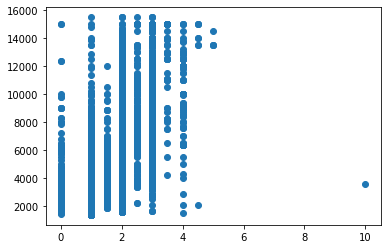

In [6]:
# Conduct your exploratory data analysis here, 
# and then modify the function above.
# Theory: predict price based on whether accessible.
#plt.scatter(x='bedrooms', y='price', data=df)
plt.scatter(x='bathrooms', y='price', data=df)
#plt.scatter(x='inaccessible', y='price', data=df)
#plt.scatter(x='Outdoor_perks', y='price', data=df)
df.info()
#sns.regplot(x='bedrooms', y='price', data=df, fit_reg=True)
#df['wheelchair_access'].value_counts()
#df['inaccessible'].sort_values(ascending=True)


In [10]:
df['total_rooms'].head()


created
2016-06-24 07:54:24    4.5
2016-06-12 12:19:27    3.0
2016-04-17 03:26:41    2.0
2016-04-18 02:22:02    2.0
2016-04-28 01:32:41    5.0
Name: total_rooms, dtype: float64

# II. Split Data

**Task 3:** Split your DataFrame `df` into a feature matrix `X` and the target vector `y`. You want to predict `'price'`.

**Note:** In contrast to the last module project, this time you should include _all_ the numerical features in your dataset.

In [13]:
#target = 'price'

#X = df.select_dtypes('number').drop(columns=target)
# is the same as saying...
#X = df.drop(columns=target)
#y = df[target]
# Or I remove the object drop in wrangle... 
X = df.drop(['description', 'display_address', 'street_address', 'interest_level'], axis=1)#columns
y = df['price']

print(f'Feature matrix (X) shape: {X.shape}\nTarget vector (y) shape: {y.shape}')
# show target (price) is missing
X#.index

Feature matrix (X) shape: (47260, 32)
Target vector (y) shape: (47260,)


,bathrooms,bedrooms,latitude,longitude,price,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,...,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space,petBias,inaccessible,total_rooms
created,,,,,,,,,,,,,,,,,,,,,
2016-06-24 07:54:24,1.5,3,40.7145,-73.9425,3000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,4.5
2016-06-12 12:19:27,1.0,2,40.7947,-73.9667,5465,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,3.0
2016-04-17 03:26:41,1.0,1,40.7388,-74.0018,2850,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,2.0
2016-04-18 02:22:02,1.0,1,40.7539,-73.9677,3275,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,2.0
2016-04-28 01:32:41,1.0,4,40.8241,-73.9493,3350,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-02 05:41:05,1.0,2,40.7426,-73.9790,3200,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3.0
2016-04-04 18:22:34,1.0,1,40.7102,-74.0163,3950,1,1,0,1,1,...,0,0,1,0,0,0,1,0,0,2.0
2016-04-16 02:13:40,1.0,1,40.7601,-73.9900,2595,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,2.0


**Task 4:** Split `X` and `y` into a training set (`X_train`, `y_train`) and a test set (`X_test`, `y_test`).

- Your training set should include data from April and May 2016. 
- Your test set should include data from June 2016.

In [16]:
# X_train, y_train = ..., ...
# X_test, y_test = ..., ...
#df=df.sort_index()

#X_train, y_train = X.loc['2016-04-01' : '2016-05-31'], y.loc['2016-04-01' : '2016-05-31']
#X_test, y_test = X.loc['2016-06-01' : '2016-06-30'], y.loc['2016-06-01' : '2016-06-30']

# Creating the cutoff for training and test data sets

#cutoff = '2016-06-01'  #BLOCKER Do I Need the time?! Is this why my data was limited?
cutoff = '2016-05-30 00:00:00'
mask = X.index < cutoff
X_train, y_train = X.loc[mask], y.loc[mask]
X_test, y_test = X.loc[~mask], y.loc[~mask]

# can be shorter with...
#cutoff = X.index <'2016-06-01'

# Creating the training data set
#X_train, y_train = X.loc[cutoff], y.loc[cutoff]

# Creating the test data set
#X_test, y_test = X.loc[~cutoff], y.loc[~cutoff]


X_train.head()


,bathrooms,bedrooms,latitude,longitude,price,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,...,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space,petBias,inaccessible,total_rooms
created,,,,,,,,,,,,,,,,,,,,,
2016-04-17 03:26:41,1.0,1,40.7388,-74.0018,2850,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,2.0
2016-04-18 02:22:02,1.0,1,40.7539,-73.9677,3275,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,2.0
2016-04-28 01:32:41,1.0,4,40.8241,-73.9493,3350,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,5.0
2016-04-19 04:24:47,2.0,4,40.7429,-74.0028,7995,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,6.0
2016-04-27 03:19:56,1.0,2,40.8012,-73.9660,3600,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,3.0


# III. Establish Baseline

**Task 5:** Since this is a **regression** problem, you need to calculate the baseline mean absolute error for your model. First, calculate the mean of `y_train`. Next, create a list `y_pred` that has the same length as `y_train` and where every item in the list is the mean. Finally, use `mean_absolute_error` to calculate your baseline.

In [18]:
from sklearn.metrics import mean_absolute_error

y_pred = [y_train.mean()] * len(y_train)
baseline_mae = mean_absolute_error(y_train, y_pred) 

print('Baseline MAE:', baseline_mae)
print('Mean Apartment rent', y_train.mean())

Baseline MAE: 1203.3593981356803
Mean Apartment rent 3573.137094665272


# IV. Build Model

**Task 6:** Build and train a `LinearRegression` model named `model` using your feature matrix `X_train` and your target vector `y_train`.

In [19]:
# Step 1: Import predictor class
from sklearn.linear_model import LinearRegression

# Step 2: Instantiate predictor
model = LinearRegression()

# Step 3: Fit predictor on the (training) data
model.fit(X_train, y_train)


LinearRegression()

# V. Check Metrics

**Task 7:** Calculate the training and test mean absolute error for your model.

In [20]:
#In two steps...
#y_pred_train = model.predict(X_train)
#y_pred_test = model.predict(X_test)
##NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.
#training_mae = mean_absolute_error(y_pred_train,y_train)
#test_mae = mean_absolute_error(y_pred_test,y_test)

#In one...
training_mae = mean_absolute_error(y_train, model.predict(X_train))
test_mae = mean_absolute_error(y_test, model.predict(X_test))

print('Training MAE:', training_mae)
print('Test MAE:', test_mae)

Training MAE: 1.1024784061035873e-12
Test MAE: 1.099804885724724e-12


**Task 8:** Calculate the training and test $R^2$ score for your model.

In [21]:
training_r2 = model.score(X_train,y_train)
test_r2 = model.score(X_test,y_test)

print('Training MAE:', training_r2)
print('Test MAE:', test_r2)

Training MAE: 1.0
Test MAE: 1.0


In [ ]:
# BLOCKER Whats 1 again?  Ok, I fixed 

# VI. Communicate Results

**Stretch Goal:** What are the three most influential coefficients in your linear model? You should consider the _absolute value_ of each coefficient, so that it doesn't matter if it's positive or negative.

In [27]:
intercept = (model.intercept_)
print(intercept)

9.258656064048409e-10


In [22]:
# Lets look at the coefficients and what they are associated with
feature_importance = abs(pd.Series(model.coef_, index = X_train.columns)).sort_values()
feature_importance.head()


petBias             1.360126e-14
exclusive           1.362574e-14
fitness_center      1.953104e-14
new_construction    2.588131e-14
loft                3.434771e-14
dtype: float64

In [24]:
feature_importance = abs(pd.Series(model.coef_, index = X_train.columns)).sort_values()
feature_importance.head()

petBias             1.360126e-14
exclusive           1.362574e-14
fitness_center      1.953104e-14
new_construction    2.588131e-14
loft                3.434771e-14
dtype: float64

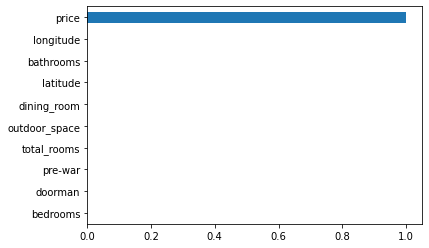

In [23]:
feature_importance.tail(10).plot(kind = 'barh')
plt.show()

In [25]:
feature_importance = abs(pd.Series(model.coef_, index=X_train.columns)).sort_values(key=abs).tail(10)
feature_importance.head()

bedrooms         3.340661e-13
doorman          4.046321e-13
pre-war          4.212181e-13
total_rooms      6.186425e-13
outdoor_space    6.291203e-13
dtype: float64

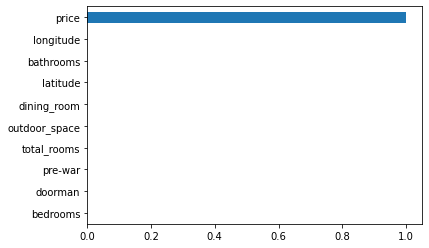

In [26]:
feature_importance = abs(pd.Series(model.coef_, index=X_train.columns)).sort_values(key=abs).tail(10)
feature_importance.head()

feature_importance.tail(10).plot(kind = 'barh')
plt.show()

In [29]:

X_train.columns


Index(['bathrooms', 'bedrooms', 'latitude', 'longitude', 'price', 'elevator',
       'cats_allowed', 'hardwood_floors', 'dogs_allowed', 'doorman',
       'dishwasher', 'no_fee', 'laundry_in_building', 'fitness_center',
       'pre-war', 'laundry_in_unit', 'roof_deck', 'outdoor_space',
       'dining_room', 'high_speed_internet', 'balcony', 'swimming_pool',
       'new_construction', 'terrace', 'exclusive', 'loft', 'garden_patio',
       'wheelchair_access', 'common_outdoor_space', 'petBias', 'inaccessible',
       'total_rooms'],
      dtype='object')